# SSP Trajectory Encoding

Objective: Encode trajectories in SSPs using the method described in the Neural Computation Paper (Simulating and Predicting Dynamical Systems using SSPs, Voelker et al, 2021)

We will first generate arbitrary 1D trajectories and look at the similarity as the trajectory is smoothly varied.

## 1 D Trajectories

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ssp_bayes_opt import sspspace
from numpy.polynomial import legendre

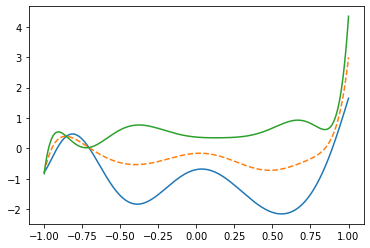

In [8]:
# Generate 2 Random 2D Trajectories
leg_dim = 10

ts = np.linspace(-1,1,1000)

c1 = np.random.normal(size=(leg_dim,))
c2 = np.random.random(size=(leg_dim,))

c3 = 0.5 * c1 + 0.5 * c2

vals1 = legendre.legval(ts, c1)
vals2 = legendre.legval(ts, c2)
vals3 = legendre.legval(ts, c3)

plt.plot(ts, vals1, label='C1')
plt.plot(ts, vals3, ls='--', label='(C1 + C2)/2')
plt.plot(ts, vals2, label='C2')

In [3]:
print(ts.shape, vals1.shape)

(1000,) (1000,)


In [9]:
# Constants:

ssp_dim = 101
len_scale_1d = 1

In [15]:
def make_trajectory(ts, coeffs):
    return np.vstack((ts, legendre.legval(ts, coeffs))).T

def encode_trajectory(traj, ssp_space):
    return np.sum(ssp_space.encode(traj), axis=0)

ssp_space = sspspace.RandomSSPSpace(domain_dim=2, 
                                    ssp_dim=ssp_dim, 
                                    domain_bounds=np.array([[-1,1],[-10,10]]), 
                                    length_scale=len_scale_1d)

210432.9143793209
90
90 216711.66004831519
89 216699.73101137648
91 216574.94887305103
88 216537.45142683788
92 216291.6145467009


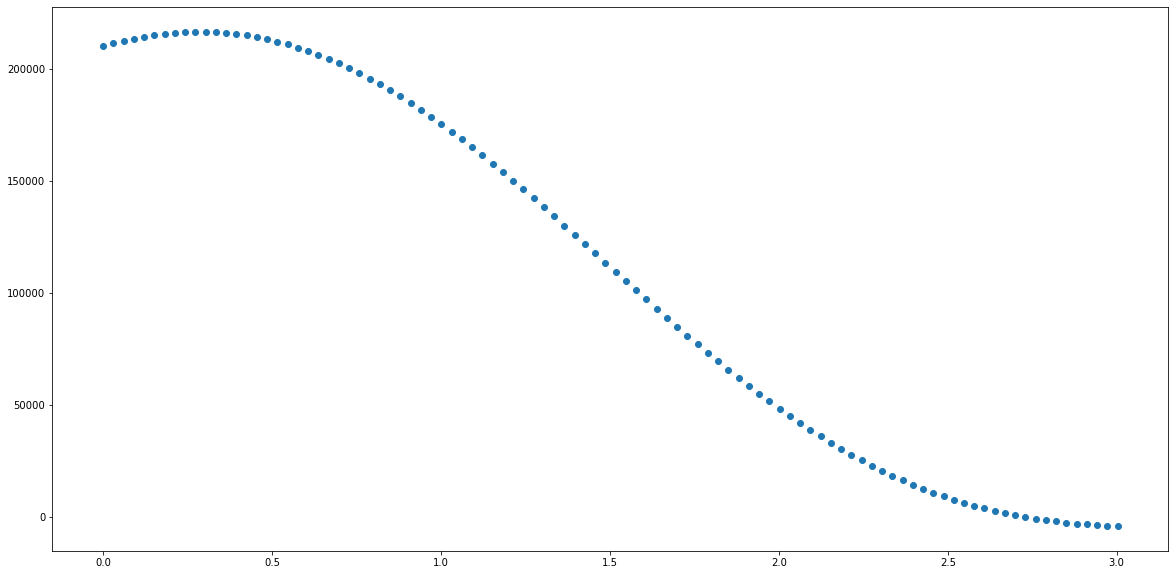

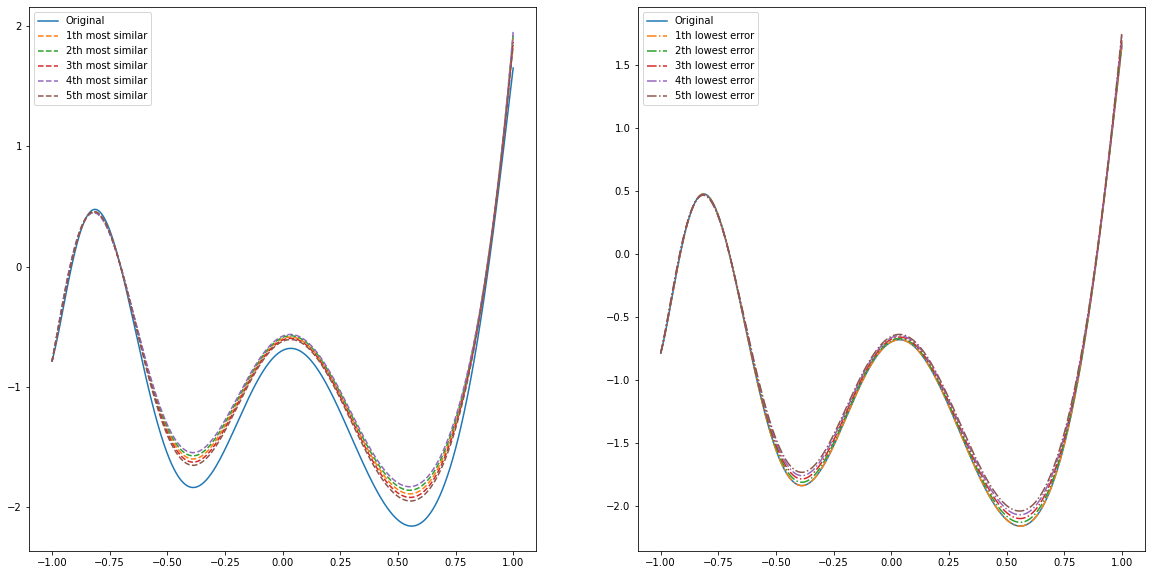

In [10]:


traj1 = make_trajectory(ts, c1)
traj2 = make_trajectory(ts, c2)

ssp_traj1 = encode_trajectory(traj1, ssp_space)
print(np.inner(ssp_traj1, ssp_traj1))
sims = []
l1_errs = []
alphas = np.linspace(0,1,100)
trajectories = []
for alpha in alphas:
    traj_mid = make_trajectory(ts, alpha * c1 + (1-alpha) * c2)
    trajectories.append(traj_mid)
    ssp_traj_mid = encode_trajectory(traj_mid, ssp_space)
    sims.append(np.dot(ssp_traj1, ssp_traj_mid))
    
    l1_errs.append(np.max(np.abs(traj1[:,1] - traj_mid[:,1])))
    
    
max_traj = trajectories[np.argmax(sims)]
print(np.argmax(sims))
min_traj = trajectories[np.argmin(sims)]

worst_idxs = np.argsort(sims)
best_err_idxs = np.argsort(l1_errs)


  
plt.figure(figsize=(20,10))
plt.scatter(l1_errs, sims)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(traj1[:,0], traj1[:,1], label='Original')
for i in range(5):
    t = trajectories[worst_idxs[-(i+1)]]
    print(worst_idxs[-(i+1)], sims[worst_idxs[-(i+1)]])
    plt.plot(t[:,0], t[:,1], ls='--', label=f'{i+1}th most similar')
plt.legend()    

plt.subplot(1,2,2)
plt.plot(traj1[:,0], traj1[:,1], label='Original')
for i in range(5):
    t = trajectories[best_err_idxs[i]]
    plt.plot(t[:,0], t[:,1], ls='-.', label=f'{i+1}th lowest error')
plt.legend()
    

## 2D Trajectories

Considering Randomly generated 2D trajectories.

(1000, 3)


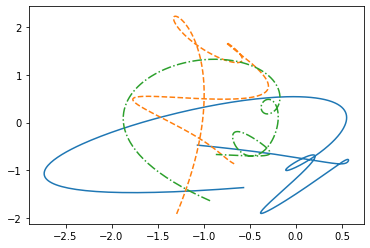

In [12]:

c1_2d = 2 * (np.random.random(size=(leg_dim,2)) - 0.5)
c2_2d = 2 * (np.random.random(size=(leg_dim,2)) - 0.5)

traj1_2d = make_trajectory(ts, c1_2d)
traj2_2d = make_trajectory(ts, c2_2d)
traj_mid_2d = make_trajectory(ts, 0.5 * c1_2d + 0.5 * c2_2d)
print(traj1_2d.shape)

plt.plot(traj1_2d[:,1], traj1_2d[:,2])
plt.plot(traj2_2d[:,1], traj2_2d[:,2], ls='--')
plt.plot(traj_mid_2d[:,1], traj_mid_2d[:,2], ls='-.')

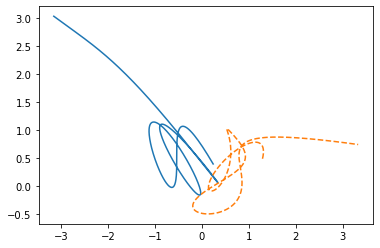

In [20]:
plt.plot(traj1_2d[:,1], traj1_2d[:,2])
plt.plot(traj2_2d[:,1], traj2_2d[:,2], ls='--')
#plt.plot(traj_mid_2d[:,1], traj_mid_2d[:,2], ls='-.')

26823.651717730376
99
99 26823.651717730376
98 25192.27080804933
97 20550.898731941295
96 14843.152441801183
84 12625.619961744746


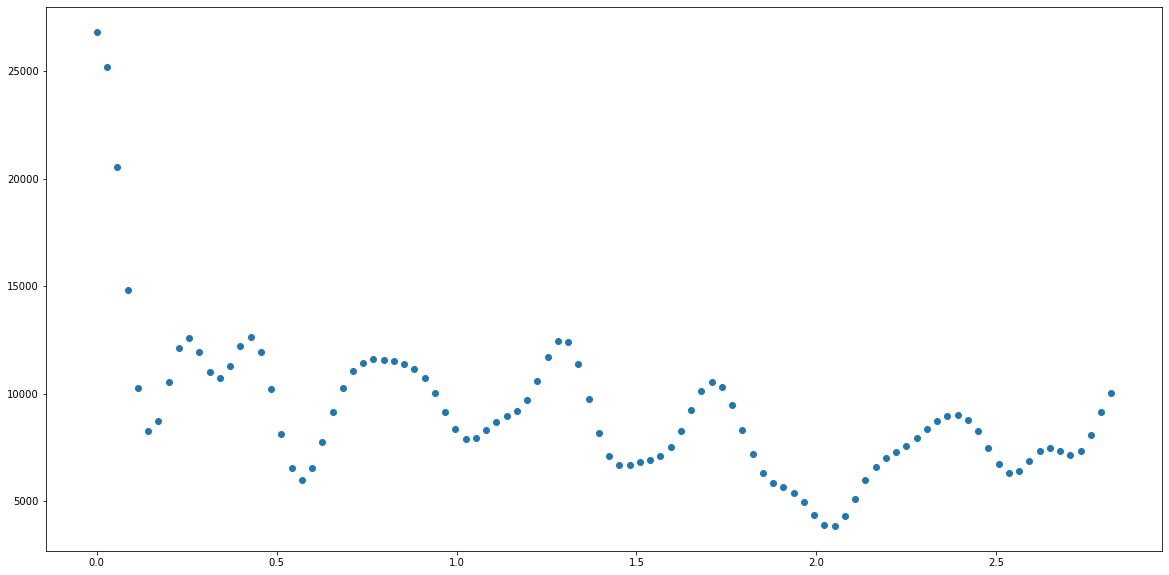

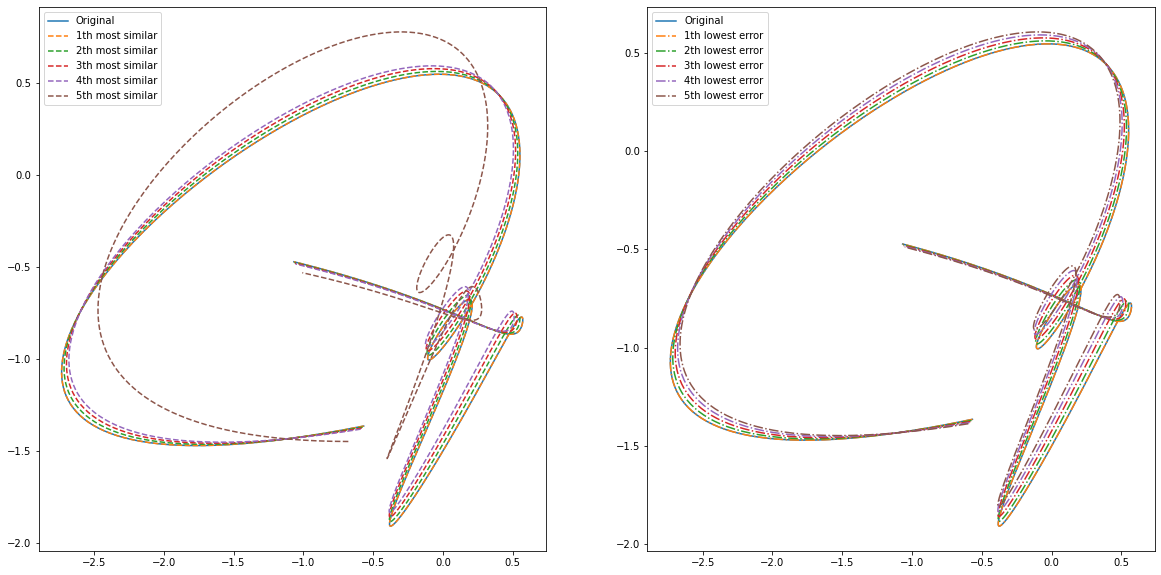

In [13]:
ssp_space = sspspace.RandomSSPSpace(domain_dim=3, 
                                    ssp_dim=ssp_dim, 
                                    domain_bounds=np.array([[-1,1],[-10,10], [-10,10]]), 
                                    length_scale=1e-1)

traj1_2d = make_trajectory(ts, c1_2d)
traj2_2d = make_trajectory(ts, c2_2d)

ssp_traj1_2d = encode_trajectory(traj1_2d, ssp_space)
print(np.inner(ssp_traj1_2d, ssp_traj1_2d))
sims = []
l2_errs = []
alphas = np.linspace(0,1,100)
trajectories = []
for alpha in alphas:
    traj_mid_2d = make_trajectory(ts, alpha * c1_2d + (1-alpha) * c2_2d)
    trajectories.append(traj_mid_2d)
    ssp_traj_mid_2d = encode_trajectory(traj_mid_2d, ssp_space)
    sims.append(np.dot(ssp_traj1_2d, ssp_traj_mid_2d))
    
    l2_errs.append(np.max(np.linalg.norm(traj1_2d - traj_mid_2d, axis=1)))
    
    
max_traj_2d = trajectories[np.argmax(sims)]
print(np.argmax(sims))
min_traj_2d = trajectories[np.argmin(sims)]

worst_idxs = np.argsort(sims)
best_err_idxs = np.argsort(l2_errs)


  
plt.figure(figsize=(20,10))
plt.scatter(l2_errs, sims)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(traj1_2d[:,1], traj1_2d[:,2], label='Original')
for i in range(5):
    t = trajectories[worst_idxs[-(i+1)]]
    print(worst_idxs[-(i+1)], sims[worst_idxs[-(i+1)]])
    plt.plot(t[:,1], t[:,2], ls='--', label=f'{i+1}th most similar')
plt.legend()    

plt.subplot(1,2,2)
plt.plot(traj1_2d[:,1], traj1_2d[:,2], label='Original')
for i in range(5):
    t = trajectories[best_err_idxs[i]]
    plt.plot(t[:,1], t[:,2], ls='-.', label=f'{i+1}th lowest error')
plt.legend()
    

# Comparison between Randomly Generated Trajectories

Instead of smoothly varying between two trajectories, randomly generate a number of trajectories and see how similarity compares.

(1000, 3)


Text(0.5, 1.0, 'Correlation Coefficient between Trajectory Similarity and Mean L2 Error')

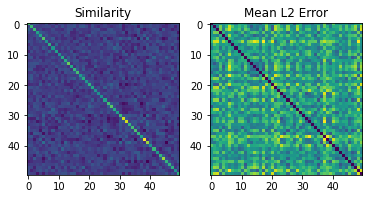

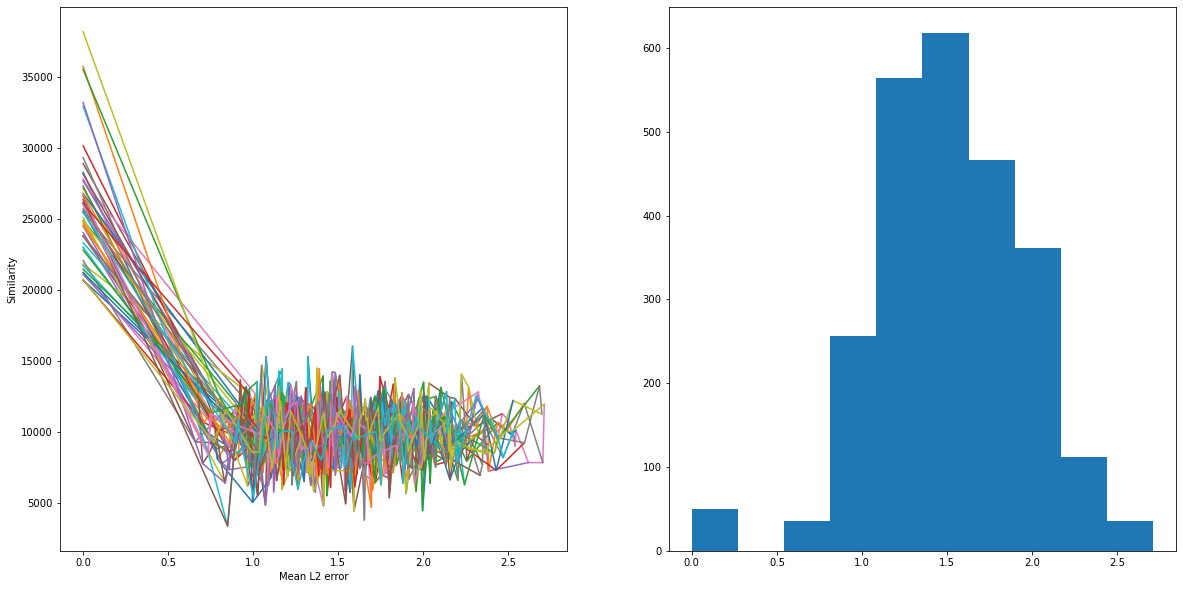

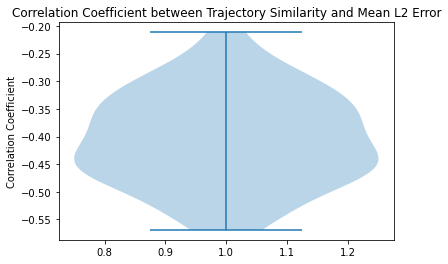

In [52]:
num_traj = 50

np.random.seed(1)

def gen_coeffs(leg_dim, domain_dim=2):
     return 2 * (np.random.random(size=(leg_dim, domain_dim)) - 0.5)
    
def traj_err(tau_1, tau_2):
    return np.mean(np.linalg.norm(tau_1-tau_2, axis=1))


ssp_space = sspspace.RandomSSPSpace(domain_dim=3, 
                                    ssp_dim=ssp_dim, 
                                    domain_bounds=np.array([[-1,1],[-10,10], [-10,10]]), 
                                    length_scale=1e-1)

trajectories = [make_trajectory(ts, gen_coeffs(leg_dim)) for _ in range(num_traj)]
print(trajectories[0].shape)
ssp_trajs = [encode_trajectory(tau, ssp_space) for tau in trajectories]

sims = np.zeros((num_traj, num_traj))
errs = np.zeros(sims.shape)

for i in range(num_traj):
    for j in range(i, num_traj):
        sims[i,j] = np.dot(ssp_trajs[i], ssp_trajs[j])
        sims[j,i] = sims[i,j]
        errs[i,j] = traj_err(trajectories[i], trajectories[j])
        errs[j,i] = errs[i,j]
        
        
plt.subplot(1,2,1)
plt.imshow(sims)
plt.title('Similarity')
plt.subplot(1,2,2)
plt.imshow(errs)
plt.title('Mean L2 Error')



import scipy as sp


corr_coeffs = np.zeros((num_traj,))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
for i in range(num_traj):
    sort_idx = np.argsort(errs[i,:])
    plt.plot(errs[i,sort_idx], sims[i, sort_idx])
    corr_coeffs[i] = sp.stats.pearsonr(errs[i,sort_idx], sims[i,sort_idx])[0]
    
plt.xlabel('Mean L2 error')
plt.ylabel('Similarity')

plt.subplot(1,2,2)
plt.hist(errs.flatten())

plt.figure()
plt.violinplot(corr_coeffs)
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient between Trajectory Similarity and Mean L2 Error')
    

Similarity and Mean L2 error are (negatively) correlated.